# Cluster Analysis Course Notebook

### Importing Data files

In [22]:
#Import Product DataSet here
import pandas as pd

product_data = pd.read_csv('Product Data Set - Student 2 of 3.csv', sep = '|')
product_data.head()

PRODUCT CODE PRODUCT CATEGORY UNIT LIST PRICE
0         30001  HEALTH & BEAUTY          $7.45 
1         30002  HEALTH & BEAUTY          $5.35 
2         30003  HEALTH & BEAUTY          $5.49 
3         30004  HEALTH & BEAUTY          $6.46 
4         30005  HEALTH & BEAUTY          $7.33

In [24]:
#Import Transaction DataSet here

transactions_data = pd.read_csv('Transaction Data Set - Student 3 of 3.csv', sep = '|')
transactions_data.head()

CUSTOMER NUM  PRODUCT NUM  QUANTITY PURCHASED  DISCOUNT TAKEN  \
0         10114        30011                   4             0.0   
1         10217        30016                   3             0.0   
2         10224        30013                   4             0.0   
3         10103        30012                   3             0.2   
4         10037        30010                   8             0.0   

  TRANSACTION DATE  STOCKOUT  
0         1/2/2015         0  
1         1/2/2015         0  
2         1/2/2015         0  
3         1/2/2015         0  
4         1/2/2015         0

In [17]:
#Import Customer Dataset Here

customer_data = pd.read_csv('Customer Data Set - Student 1 of 3.csv')
customer_data.head()

CUSTOMERID  GENDER  AGE    INCOME  EXPERIENCE SCORE LOYALTY GROUP  \
0       10001       0   64  $133,498                 5      enrolled   
1       10002       0   42   $94,475                 9   notenrolled   
2       10003       0   40   $88,610                 9      enrolled   
3       10004       0   38   $84,313                 8      enrolled   
4       10005       0   30   $51,498                 3   notenrolled   

  ENROLLMENT DATE  HOUSEHOLD SIZE MARITAL STATUS  
0      06-03-2013               4         Single  
1             NaN               6        Married  
2      02-09-2010               5        Married  
3      06-04-2015               1         Single  
4             NaN               1         Single

### Changing data types

In [15]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : x.replace('$',''))

In [14]:
customer_data['INCOME']=customer_data['INCOME'].map(lambda x : int(x.replace(',','')))

### Creating Customer View

In [25]:
trans_products=transactions_data.merge(product_data,how='inner', left_on='PRODUCT NUM', right_on='PRODUCT CODE')
trans_products.head()

CUSTOMER NUM  PRODUCT NUM  QUANTITY PURCHASED  DISCOUNT TAKEN  \
0         10114        30011                   4             0.0   
1         10086        30011                   6             0.0   
2         10174        30011                  10             0.0   
3         10401        30011                  12             0.0   
4         10216        30011                  12             0.1   

  TRANSACTION DATE  STOCKOUT  PRODUCT CODE PRODUCT CATEGORY UNIT LIST PRICE  
0         1/2/2015         0         30011          APPAREL         $25.46   
1         1/2/2015         0         30011          APPAREL         $25.46   
2         1/2/2015         0         30011          APPAREL         $25.46   
3         1/2/2015         0         30011          APPAREL         $25.46   
4         1/2/2015         0         30011          APPAREL         $25.46

In [26]:
trans_products['UNIT LIST PRICE']=trans_products['UNIT LIST PRICE'].map(lambda x : float(x.replace('$','')))

In [27]:
trans_products['Total_Price']=trans_products['QUANTITY PURCHASED'] * trans_products['UNIT LIST PRICE'] * (1- trans_products['DISCOUNT TAKEN'])

In [33]:
customer_prod_categ=trans_products.groupby(['CUSTOMER NUM','PRODUCT CATEGORY']).agg({'Total_Price':'sum'})
customer_prod_categ.head()

Total_Price
CUSTOMER NUM PRODUCT CATEGORY             
10001        APPAREL              4022.430
             ELECTRONICS          1601.315
             FOOD                   68.688
             HEALTH & BEAUTY      1134.337
10002        APPAREL              2312.509

In [34]:
customer_prod_categ=customer_prod_categ.reset_index()
customer_prod_categ.head()

CUSTOMER NUM PRODUCT CATEGORY  Total_Price
0         10001          APPAREL     4022.430
1         10001      ELECTRONICS     1601.315
2         10001             FOOD       68.688
3         10001  HEALTH & BEAUTY     1134.337
4         10002          APPAREL     2312.509

In [32]:
customer_pivot=customer_prod_categ.pivot(index='CUSTOMER NUM',columns='PRODUCT CATEGORY',values='Total_Price')
customer_pivot.head()

PRODUCT CATEGORY   APPAREL  ELECTRONICS     FOOD  HEALTH & BEAUTY
CUSTOMER NUM                                                     
10001             4022.430     1601.315   68.688         1134.337
10002             2312.509     2473.163  276.779              NaN
10003             2887.382     5414.418  260.640              NaN
10004             3637.213     1840.211   45.270              NaN
10005              213.512          NaN      NaN              NaN

In [35]:
trans_total_spend=trans_products.groupby('CUSTOMER NUM').agg({'Total_Price':'sum'}).\
rename(columns={'Total_Price':'TOTAL SPENT'})
trans_total_spend.head()

TOTAL SPENT
CUSTOMER NUM             
10001            6826.770
10002            5062.451
10003            8562.440
10004            5522.694
10005             213.512

In [36]:
customer_KPIs=customer_pivot.merge(trans_total_spend,how='inner',left_index=True, right_index=True )
customer_KPIs.head()

APPAREL  ELECTRONICS     FOOD  HEALTH & BEAUTY  TOTAL SPENT
CUSTOMER NUM                                                              
10001         4022.430     1601.315   68.688         1134.337     6826.770
10002         2312.509     2473.163  276.779              NaN     5062.451
10003         2887.382     5414.418  260.640              NaN     8562.440
10004         3637.213     1840.211   45.270              NaN     5522.694
10005          213.512          NaN      NaN              NaN      213.512

In [37]:
customer_KPIs=customer_KPIs.fillna(0)
customer_KPIs.head()

APPAREL  ELECTRONICS     FOOD  HEALTH & BEAUTY  TOTAL SPENT
CUSTOMER NUM                                                              
10001         4022.430     1601.315   68.688         1134.337     6826.770
10002         2312.509     2473.163  276.779            0.000     5062.451
10003         2887.382     5414.418  260.640            0.000     8562.440
10004         3637.213     1840.211   45.270            0.000     5522.694
10005          213.512        0.000    0.000            0.000      213.512

In [38]:
customer_all_view=customer_data.merge(customer_KPIs,how='inner', left_on='CUSTOMERID', right_index=True)

In [39]:
customer_all_view.head()

CUSTOMERID  GENDER  AGE    INCOME  EXPERIENCE SCORE LOYALTY GROUP  \
0       10001       0   64  $133,498                 5      enrolled   
1       10002       0   42   $94,475                 9   notenrolled   
2       10003       0   40   $88,610                 9      enrolled   
3       10004       0   38   $84,313                 8      enrolled   
4       10005       0   30   $51,498                 3   notenrolled   

  ENROLLMENT DATE  HOUSEHOLD SIZE MARITAL STATUS   APPAREL  ELECTRONICS  \
0      06-03-2013               4         Single  4022.430     1601.315   
1             NaN               6        Married  2312.509     2473.163   
2      02-09-2010               5        Married  2887.382     5414.418   
3      06-04-2015               1         Single  3637.213     1840.211   
4             NaN               1         Single   213.512        0.000   

      FOOD  HEALTH & BEAUTY  TOTAL SPENT  
0   68.688         1134.337     6826.770  
1  276.779            0.000     5062.451  
2  260.640            0.000     8562.440  
3   45.270            0.000     5522.694  
4    0.000            0.000      213.512

# Clustering  

In [ ]:
#Begin Writing your code here

In [44]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [49]:
cluster_input = customer_all_view[['INCOME','TOTAL SPENT']]
cluster_input.head(5)

INCOME  TOTAL SPENT
0  $133,498     6826.770
1   $94,475     5062.451
2   $88,610     8562.440
3   $84,313     5522.694
4   $51,498      213.512

In [47]:
Kmeans_model = KMeans(n_clusters=4)
Kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
cluster_input['INCOME'] = cluster_input['INCOME'].map(lambda x: x.replace('$', ''))
cluster_input['INCOME'] = cluster_input['INCOME'].map(lambda x: float(x.replace(',', '')))

In [53]:
cluster_input.dtypes

INCOME         float64
TOTAL SPENT    float64
dtype: object

In [56]:
cluster_output = Kmeans_model.fit_predict(cluster_input)
cluster_output

array([3, 2, 2, 2, 0, 3, 2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 1, 3, 0, 1, 1,
       1, 0, 1, 1, 2, 0, 0, 3, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2,
       3, 0, 0, 2, 3, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 3, 1, 3, 2,
       2, 1, 0, 2, 2, 0, 0, 2, 3, 0, 2, 0, 2, 3, 2, 1, 3, 1, 0, 1, 3, 0,
       2, 0, 1, 3, 1, 1, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 3, 3, 2, 2, 0, 2, 1, 0, 2, 2, 1, 2, 0, 3, 2, 2,
       0, 2, 3, 2, 3, 3, 1, 2, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 3, 0, 3, 1, 0, 2, 0, 3, 2, 0, 3, 0, 1, 1, 3, 0,
       3, 3, 1, 0, 3, 0, 2, 0, 1, 3, 1, 1, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3,
       1, 2, 1, 0, 3, 3, 1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 3, 1, 0, 1, 2, 0,
       2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 3, 0, 0, 0, 2,
       2, 2, 2, 0, 1, 1, 3, 0, 2, 1, 0, 1, 0, 2, 0, 3, 1, 1, 0, 3, 0, 2,
       2, 3, 1, 2, 2, 1, 3, 0, 3, 0, 0, 0, 3, 2, 1, 1, 1, 2, 2, 2, 3, 2,
       1, 2, 1, 3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0,

In [57]:
type(cluster_output)

numpy.ndarray

In [65]:
product_data.head().values[1,:]
#product_data.head().values[1,2]

array([30002, 'HEALTH & BEAUTY', ' $5.35 '], dtype=object)

In [68]:
#converting numpy array to pandas dataframe
cluster_output_pd=pd.DataFrame(cluster_output,columns=['segment'])
cluster_output_pd.head()

segment
0        3
1        2
2        2
3        2
4        0

In [71]:
segment_DF = pd.concat([cluster_input,cluster_output_pd], axis = 1)
segment_DF.head()

INCOME  TOTAL SPENT  segment
0  133498.0     6826.770        3
1   94475.0     5062.451        2
2   88610.0     8562.440        2
3   84313.0     5522.694        2
4   51498.0      213.512        0

In [75]:
Kmeans_model.cluster_centers_

array([[ 40510.09803922,   2472.75349673],
       [111789.98360656,   7856.9202541 ],
       [ 79703.36956522,   5428.75010145],
       [138629.34482759,   6996.87572414]])

In [76]:
segment_DF[segment_DF.segment==0].head()
# segment_DF[segment_DF.segment==1].head()
# segment_DF[segment_DF.segment==2].head()
# segment_DF[segment_DF.segment==3].head()

INCOME  TOTAL SPENT  segment
4   51498.0      213.512        0
10  20256.0     1496.871        0
14  57251.0     7398.953        0
19  59964.0     4306.776        0
23  51529.0     2884.220        0

In [78]:
import matplotlib.pyplot as plt

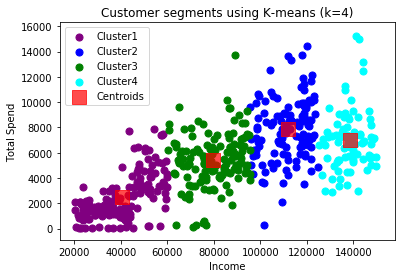

In [81]:
plt.scatter(segment_DF[segment_DF.segment==0]['INCOME'],segment_DF[segment_DF.segment==0]['TOTAL SPENT'],s=50, c='purple',label='Cluster1')

plt.scatter(segment_DF[segment_DF.segment==1]['INCOME'],segment_DF[segment_DF.segment==1]['TOTAL SPENT'],s=50, c='blue',label='Cluster2')

plt.scatter(segment_DF[segment_DF.segment==2]['INCOME'],segment_DF[segment_DF.segment==2]['TOTAL SPENT'],s=50, c='green',label='Cluster3')

plt.scatter(segment_DF[segment_DF.segment==3]['INCOME'],segment_DF[segment_DF.segment==3]['TOTAL SPENT'],s=50, c='cyan',label='Cluster4')

plt.scatter(Kmeans_model.cluster_centers_[:,0], Kmeans_model.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')

plt.title('Customer segments using K-means (k=4)')

plt.xlabel('Income')

plt.ylabel('Total Spend')

plt.legend()

plt.show()

In [82]:
customer_demographics = pd.concat([customer_all_view, cluster_output_pd], axis=1)
customer_demographics.head()

CUSTOMERID  GENDER  AGE    INCOME  EXPERIENCE SCORE LOYALTY GROUP  \
0       10001       0   64  $133,498                 5      enrolled   
1       10002       0   42   $94,475                 9   notenrolled   
2       10003       0   40   $88,610                 9      enrolled   
3       10004       0   38   $84,313                 8      enrolled   
4       10005       0   30   $51,498                 3   notenrolled   

  ENROLLMENT DATE  HOUSEHOLD SIZE MARITAL STATUS   APPAREL  ELECTRONICS  \
0      06-03-2013               4         Single  4022.430     1601.315   
1             NaN               6        Married  2312.509     2473.163   
2      02-09-2010               5        Married  2887.382     5414.418   
3      06-04-2015               1         Single  3637.213     1840.211   
4             NaN               1         Single   213.512        0.000   

      FOOD  HEALTH & BEAUTY  TOTAL SPENT  segment  
0   68.688         1134.337     6826.770        3  
1  276.779            0.000     5062.451        2  
2  260.640            0.000     8562.440        2  
3   45.270            0.000     5522.694        2  
4    0.000            0.000      213.512        0

In [85]:
customer_demographics.groupby('segment').agg({'AGE':'mean', 'HOUSEHOLD SIZE':'median'})

AGE  HOUSEHOLD SIZE
segment                           
0        25.104575             2.0
1        48.032787             3.0
2        36.615942             3.5
3        73.609195             2.0

In [86]:
def percent_loyalty(series):
    percent=100 * series.value_counts()['enrolled'] /series.count()
    return percent

customer_demographics.groupby('segment').agg({'AGE':'mean','HOUSEHOLD SIZE':'median','LOYALTY GROUP': percent_loyalty})

AGE  HOUSEHOLD SIZE  LOYALTY GROUP
segment                                          
0        25.104575             2.0      50.326797
1        48.032787             3.0      68.852459
2        36.615942             3.5      33.333333
3        73.609195             2.0      65.517241

In [87]:
#agglomerative clustering
AgglomerativeClustering_model=AgglomerativeClustering(n_clusters=4)